# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [14]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE 4750/Homework/hw1-badynmt`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [16]:
Pkg.add("GraphPlot")

   Resolving package versions...
  No Changes to `~/BEE 4750/Homework/hw1-badynmt/Project.toml`
  No Changes to `~/BEE 4750/Homework/hw1-badynmt/Manifest.toml`


In [12]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

UndefVarError: UndefVarError: `Pkg` not defined

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [8]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


##### Explanation
The issue with the code above is that the function compares each value in the array to the pre-defined "minimum value" zero. It does not compare each value in the array to the other values in the array. You should not be comparing the numbers in the array to an external value. The inccorect function will only return the minimum value if there is a value in the array less than 0.

In [12]:
# Fixed version of the above function
function minimum_fixed(array)
    # THis function finds the minimum value in an array
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

# Using hte fixed code to solve the problem
array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum_fixed(array_values);

minimum_fixed(array_values) = 78


The above function is now fixed and compares each value in the array to the other values in the array instead of comparing them to an external value. You can begin with the miimum value being the first number in the array because all subsequent values will be compared to it and it will be replaced if a subsequent number in the array is less than the stored minimum value.

#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [13]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

##### Explanation
This code produces an error "'average_grade' not defined" due to two main erors. The code attempts to show the value that the function returns without first calling the function. Without first running the function there is no value being returned and therefore no variable 'average_grade'. In order to get this variable you must save the return of the function to that variable. Another issue is that the above code is using the 'mean' function which is part of the statistics package without first loading in the Statistics package as it was not one of the ones loaded in at the top of this document. If the user did not want to install a new package the mean could be calculated manually instead of using the built in function.

In [46]:
#Fixed Version of the code
using Statistics
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

# Solved Problem
average_grade = class_average(student_grades)
@show average_grade;

average_grade = 94.4


The above function now works by installing hte necessary packages to use the function written. Alternatively the function "class_average" could manually compute the mean by using a for loop to sum up the values in the input array then dividing by the length of the input array.

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [47]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

##### Explanation
The issue is that the code snippet used zero() which returns the element for additive identity instead of zeros() which creates an array of a specified length that can be indexed through. Another issue is that the goal is to get a sum that is greater than OR equal to 11 and the snippet only finds when it is greater than 11, not including 11 as a success.

In [45]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end

n_trials = 1_000
outcomes = zeros(n_trials)
# determine if a given trial is a success or failure
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) >= 11)
end

#print(outcomes)
win_prob = sum(outcomes) / n_trials    # compute average number of wins
@show win_prob;

win_prob = 0.495


By changing the function zero() to zeros() the list can now be itterated through. "passadieci" returns 3 values between 1 and 6 inclusive and can be called for each trial to simulate rolling 3 dice for a trial. Outcomes creates an empty array to be replaced witht he results of each trial as produced by "passadieci". Each trial is then determined to be a success - 1 or a failure - 0 based on whether the values is greater or equal to 11.

### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [54]:
function mystery_function(values)
    # This function will take in an array and return an array with all repeates removed
    y = []    #initialize empty array
    for v in values
        if !(v in y)
            append!(y, v)      #if v is NOT already in y, v will be appended onto y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


##### Explanation of mystery_function

This function takes in an array of values and iterates through to remove any repeated values, returning an array with all of the unique values from the input array. There is a built-in Julia function that will perform the same task called unique().


In [57]:
# Using a built in function to complete the same task as mystery_code - returning the unique values of an array

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show unique(list_of_values)

unique(list_of_values) = [1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

This snippet works by putting any value from the input array into a new array but first checking to see if the value is already in the new array. The order of the new array is dependant on the order of the input array and will be ordered by first occurance. It is a way to remove repeats without changing the original array.

### Problem 3

In [9]:
# Problem 3

function compute_mean(v)
    # This function returns the mean of an input vector
    sum = 0
    len = length(v)
    for i = 1:len
        sum = sum + v[i]
    end
    mn = sum/len

    return mn
end

# Calculating the mean of a random vector and subtracting the mean from the vector
random_vect = rand(10)
mn = compute_mean(random_vect)

#subtracted_vect = broadcast(.-, random_vect, mn)
subtracted_vect = random_vect .- mn

# Mean of the new vector
new_mean = compute_mean(subtracted_vect)


2.2204460492503132e-17

The above code soves this problem by first writing a function to calculate the mean by using a for loop to sum up the values in the input array then dividing by the length of the input array. The finction returns the mean of the input array. A random array is generated as a tester and the compute_mean function finds its mean. The mean is subtracted from each value in the array and stored as a variable to that the resulting sum can be inputted to the compute_mean function. The mean of the random vector minus the mean can be reasonably rounded to 0. This indicates that the code works as intended.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

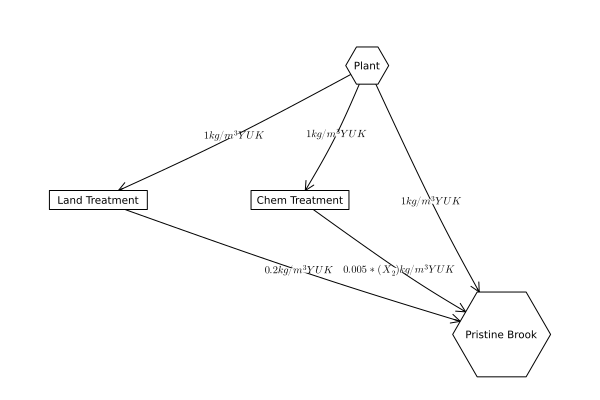

In [38]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"1kg/m^3 YUK", (1,3) => L"1kg/m^3 YUK", (1, 4) => L"1kg/m^3 YUK",(2, 4) => L"0.2kg/m^3 YUK",(3, 4) => L"0.005*(X_2)kg/m^3 YUK")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -4, -1, 2]
ypos = [2, 0, 0, -2]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.3, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

# xpos = [0, -1.5, -0.25, 1]
# ypos = [1, 0, 0, -1]

I labeled the edges such that each arrow shows the concentration of YUK being passed to the next stage after each processing step. The 2-4 and 3-4 label were overlapping with each other so I changed the positions of the markers in order to get clearer labels.

In [51]:
function YUK_discharge(X1, X2, no_treat)
    # This function takes in three arguments in m^3/day: amount of water to be discharged on land, amount of water to be treated by chemicals, and 
    # the amount of water not revieving secondary treatment
    # The function will return the total YUK discharge into the stream in kg/day and the total cost in dollars per day

    plant_flow = 100    # m^3/day wastewater
    plant_yuk = 1       # kg/m^3 YUK

    # Check that input arguments make up total flow
    if plant_flow != (X1+X2+no_treat)
        throw("input arguments do not add up to total plant flow")
    end
    
    # Define the efficiencies as proportion removed
    e1 = 0.8
    e2 = 1 - 0.005*(X2)

    cost_X1 = ((X1)^2) / (20)    # dollars per day
    cost_X2 = 1.5 * X2           # dollars per day

    total_cost = cost_X1 + cost_X2
    total_yuk_discharge = X1*(1-e1)*plant_yuk + X2*(1-e2)*plant_yuk + no_treat*(plant_yuk)       # kg/day

    return (total_yuk_discharge, total_cost)
end

YUK_discharge (generic function with 1 method)

yuk = [50.0, 46.5, 44.0, 42.5, 42.0, 42.5, 22.5, 36.0, 50.5, 58.125, 66.0, 74.125, 19.999999999999996, 50.0, 100.0]
cost = [95.0, 95.0, 105.0, 125.0, 155.0, 195.0, 200.0, 140.0, 90.0, 68.75, 50.0, 33.75, 500.0, 150.0, 0.0]


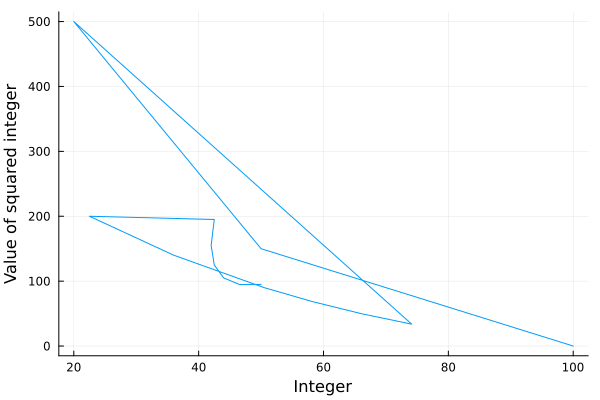

In [55]:
land =     [10, 20, 30, 40, 50, 60, 50, 40, 30, 25, 20, 15, 100, 0, 0]
chemical = [60, 50, 40, 30, 20, 10, 50, 40, 30, 25, 20, 15, 0, 100, 0]
no_treat = [30, 30, 30, 30, 30, 30,  0, 20, 40, 50, 60, 70, 0, 0, 100]

output = YUK_discharge.(land, chemical, no_treat);
yuk = [out[1] for out in output];
cost = [out[2] for out in output];

@show yuk
@show cost

plot(yuk, cost, legend=false)
xlabel!("Integer")
ylabel!("Value of squared integer")

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?


## References

List any external references consulted, including classmates.

GeeksforGeeks.org - "Broadcasting across arrays in Julia".